<a href="https://colab.research.google.com/github/henriquelealm/Machine-Learning-regression/blob/main/bodyfat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificar quantas linhas possuem dados ausentes

In [ ]:
import pandas as pd

# Carregar o arquivo CSV (substitua 'arquivo.csv' pelo caminho do seu arquivo)
df = pd.read_csv('train.csv')

# Contar linhas com dados ausentes
linhas_com_nan = df.isnull().any(axis=1).sum()

print(f"O número de linhas com dados ausentes é: {linhas_com_nan}")


O número de linhas com dados ausentes é: 162


Printar uma matriz de correlação entre as variáveis para entender melhor o conjunto de dados

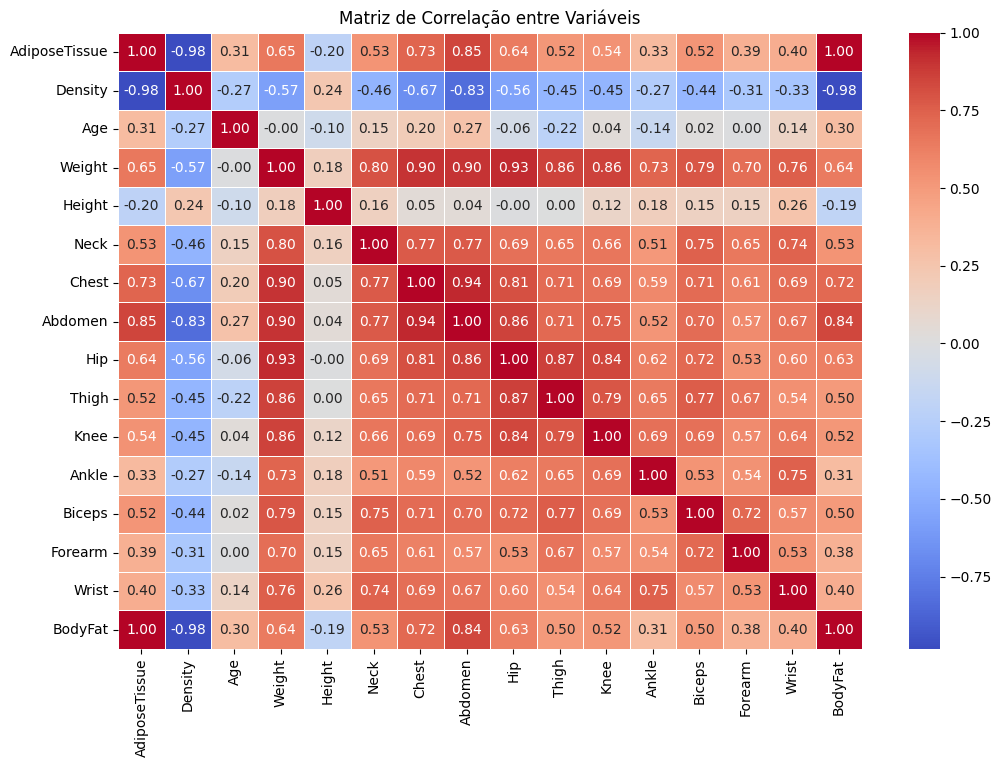

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Configurar a visualização do mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


Como a quantidade de linhas com dados ausentes é muito alta, será necessário realizar uma imputação desses dados. É realizada a comparação de diferentes algoritmos de imputação calculando o MSE em função da variável 'bodyfat'

Verificar o melhor valor de n_neighbors para o algoritmo KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('BodyFat', axis=1), df['BodyFat'], test_size=0.2, random_state=42)

valores_n_neighbors = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

resultados_mse = {}

# Avaliar o desempenho para cada valor de n_neighbors
for n_neighbors in valores_n_neighbors:
    imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_imputed = imputer.fit_transform(X_train)
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean_score = -cv_scores.mean()
    resultados_mse[n_neighbors] = cv_mean_score

# Encontrar o melhor valor de n_neighbors com o menor MSE médio
melhor_n_neighbors = min(resultados_mse, key=resultados_mse.get)
melhor_mse = resultados_mse[melhor_n_neighbors]

print(f"Melhor valor de n_neighbors: {melhor_n_neighbors}")
print(f"MSE médio correspondente: {melhor_mse}")


Melhor valor de n_neighbors: 20
MSE médio correspondente: 5.608368976008293


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

# Lista de técnicas de imputação
imputation_techniques = {
    'Mean': SimpleImputer(strategy='mean'),
    'Median': SimpleImputer(strategy='median'),
    'Mode': SimpleImputer(strategy='most_frequent'),
    'KNN': KNNImputer(n_neighbors=20),
    'Linear Regression': IterativeImputer(estimator=LinearRegression(), max_iter=100),
    'Bayesian Ridge': IterativeImputer(estimator=BayesianRidge(), max_iter=100),
    'Decision Tree': IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=100),
    'Random Forest': IterativeImputer(estimator=RandomForestRegressor(), max_iter=100),
    'Extra Trees': IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=100),
    'KNN Regressor': IterativeImputer(estimator=KNeighborsRegressor(), max_iter=100)
}

# Avaliação de cada técnica usando validação cruzada
for name, imputer in imputation_techniques.items():
    X_train_imputed = imputer.fit_transform(X_train)
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean_score = -cv_scores.mean()
    print(f'Média do MSE da validação cruzada com imputação por {name}: {cv_mean_score}')


Média do MSE da validação cruzada com imputação por Mean: 7.565820472449177

Média do MSE da validação cruzada com imputação por Median: 7.395556149844181

Média do MSE da validação cruzada com imputação por Mode: 8.528928487587404

Média do MSE da validação cruzada com imputação por KNN: 5.608368976008293

Média do MSE da validação cruzada com imputação por Linear Regression: 1.20701229344789

Média do MSE da validação cruzada com imputação por Bayesian Ridge: 4.168613329979159

Média do MSE da validação cruzada com imputação por Decision Tree: 2.1128898404812753

Média do MSE da validação cruzada com imputação por Random Forest: 1.840436989480909

Média do MSE da validação cruzada com imputação por Extra Trees: 1.6110933842456283

Média do MSE da validação cruzada com imputação por KNN Regressor: 5.014599292674336

Após decidir como imputar os dados, é necessário realizar uma análise estatística deles

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


# Imputação por regressão
imputer = IterativeImputer(estimator=LinearRegression())
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Exibir as primeiras linhas do DataFrame após a imputação
print(df_imputed.head())

# Salvar o DataFrame com os dados imputados em um arquivo CSV
df_imputed.to_csv('dados_imputados.csv', index=False)

# Baixar o arquivo CSV
files.download('dados_imputados.csv')


   AdiposeTissue  Density   Age  Weight     Height  Neck       Chest  Abdomen  \
0           29.9   1.0316  65.0  189.75  65.750000  40.8  106.400000    100.5   
1           27.0   1.0378  72.0  168.00  69.250000  38.5  101.400000     99.8   
2            8.8   1.0790  29.0  160.75  69.000000  36.7   97.400000     83.5   
3           34.3   1.0180  35.0  228.25  65.717622  40.4  114.900000    115.9   
4           20.3   1.0525  35.0  224.75  72.250000  43.9  112.776371    100.4   

     Hip      Thigh       Knee  Ankle  Biceps    Forearm  Wrist  BodyFat  
0  100.5  60.079541  38.100000   24.0    35.9  30.955464   19.1     29.9  
1   96.2  56.300000  36.600000   22.0    29.7  26.300000   18.0     27.0  
2   98.7  58.900000  35.300000   22.6    30.1  26.700000   17.6      8.8  
3  111.9  74.400000  42.083701   24.0    36.1  31.800000   18.8     34.3  
4  106.8  63.300000  41.700000   24.6    37.2  33.100000   19.8     20.3  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Resumo Estatístico
print("Resumo Estatístico:\n")
print(df_imputed.describe())

# 2. Verificação de Nulos
print("\nValores Nulos:")
print(df_imputed.isnull().sum())


Resumo Estatístico:

       AdiposeTissue     Density         Age      Weight      Height  \
count     176.000000  176.000000  176.000000  176.000000  176.000000   
mean       19.571591    1.054688   45.235612  178.783575   69.900885   
std         8.796674    0.020055   12.414363   28.373024    4.025300   
min         0.000000    0.995000   12.028395  118.500000   29.500000   
25%        12.375000    1.039900   38.804244  159.111426   68.000000   
50%        19.900000    1.053761   44.000000  176.500000   70.000000   
75%        26.000000    1.070500   54.363610  198.500000   72.000000   
max        47.500000    1.108900   81.000000  262.750000   77.750000   

             Neck       Chest     Abdomen         Hip       Thigh        Knee  \
count  176.000000  176.000000  176.000000  176.000000  176.000000  176.000000   
mean    37.986016  100.982372   93.034030   99.922781   59.391838   38.667324   
std      2.326901    8.323568   11.121383    6.843170    5.168329    2.406808   
min   

Visualizar a distribuição de todas as colunas

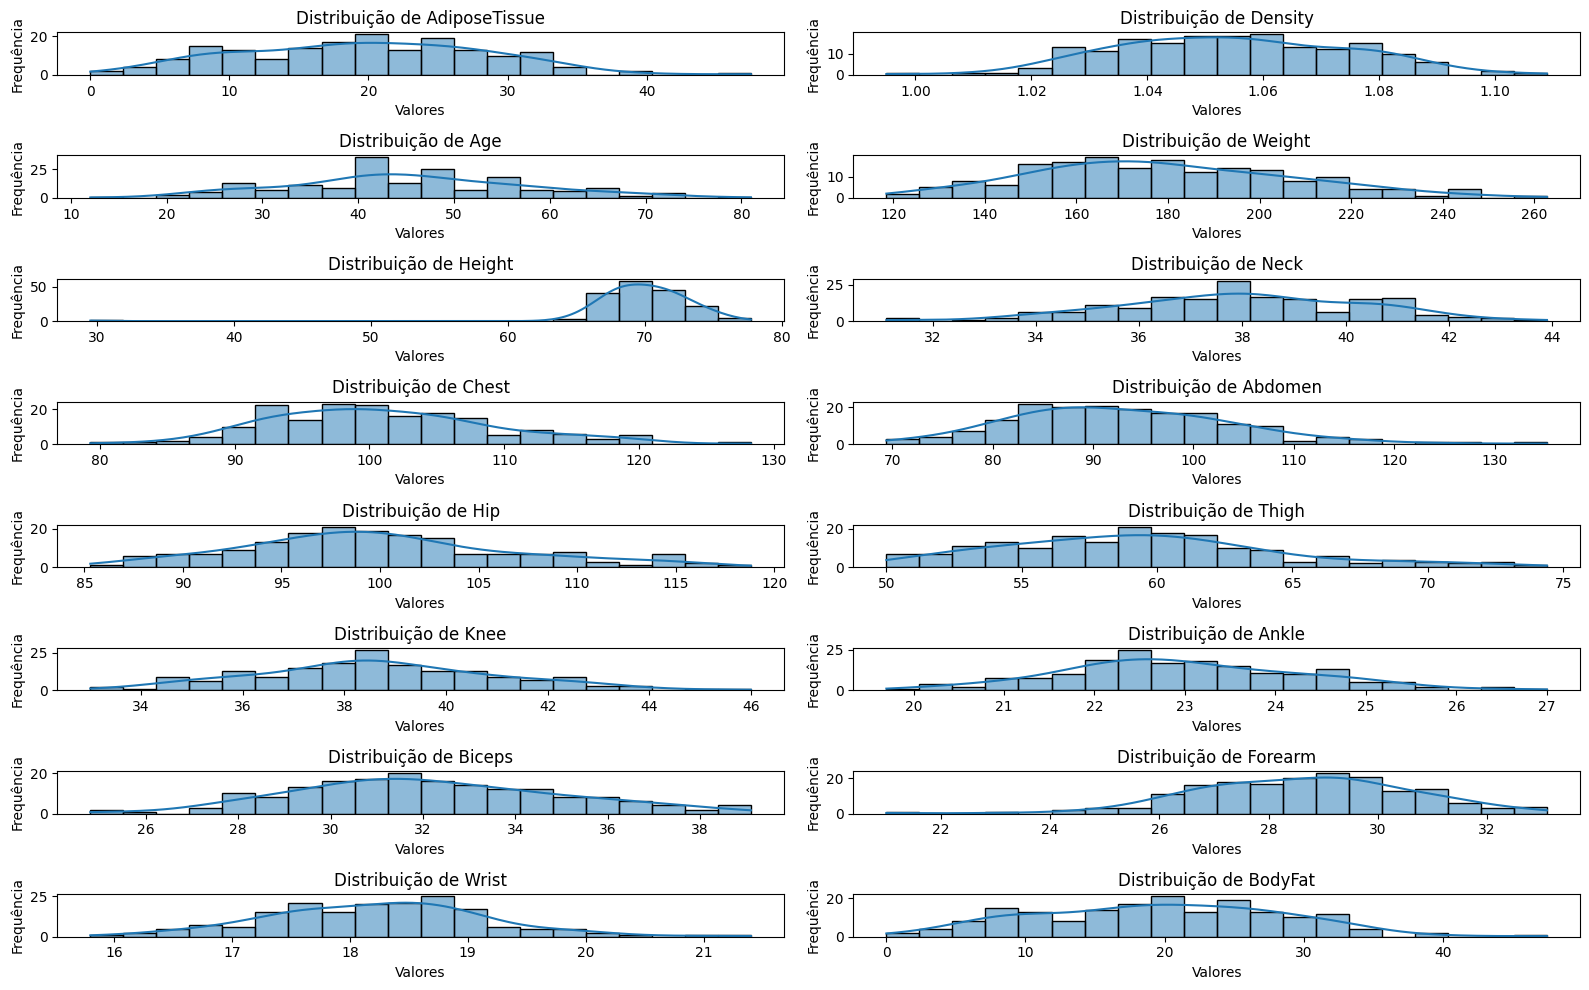

In [ ]:
# 3. Visualização de Distribuições
num_columns = len(df_imputed.columns)
num_rows = (num_columns + 1) // 2  # Calcular o número de linhas para a grade de subplots

plt.figure(figsize=(16, 10))

for i, column in enumerate(df_imputed.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_imputed[column], bins=20, alpha=0.5, kde=True)
    plt.title(f'Distribuição de {column}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()


Imprimir a matriz de correlação após a imputação para verificar se houveram mudanças bruscas

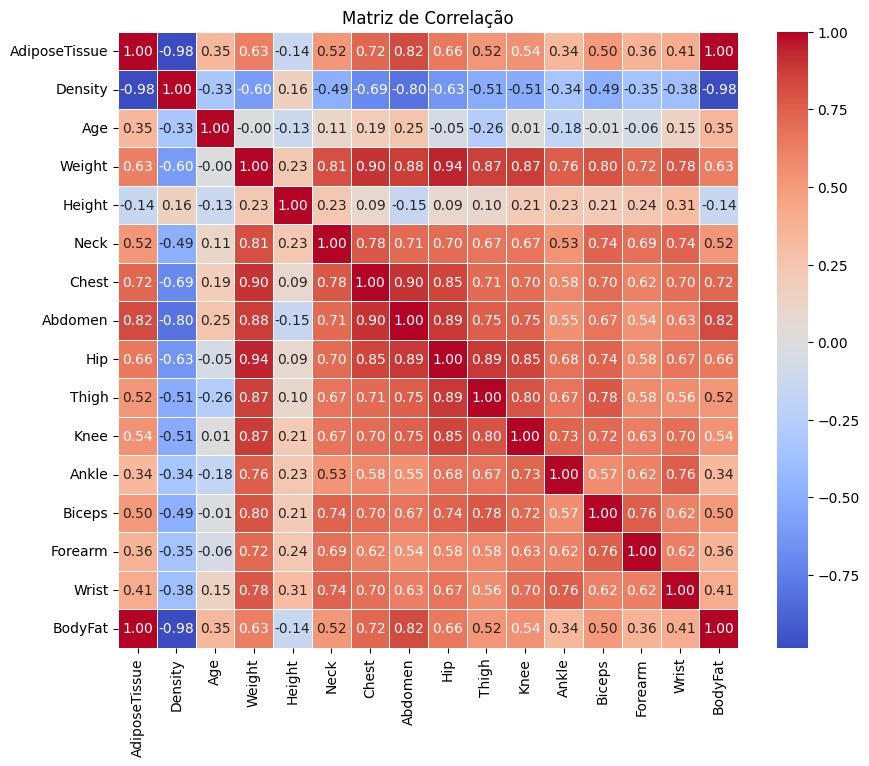

In [ ]:
correlation_matrix = df_imputed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


Imprimir o gráfico de dispersão das colunas (todas em função de bodyfat)

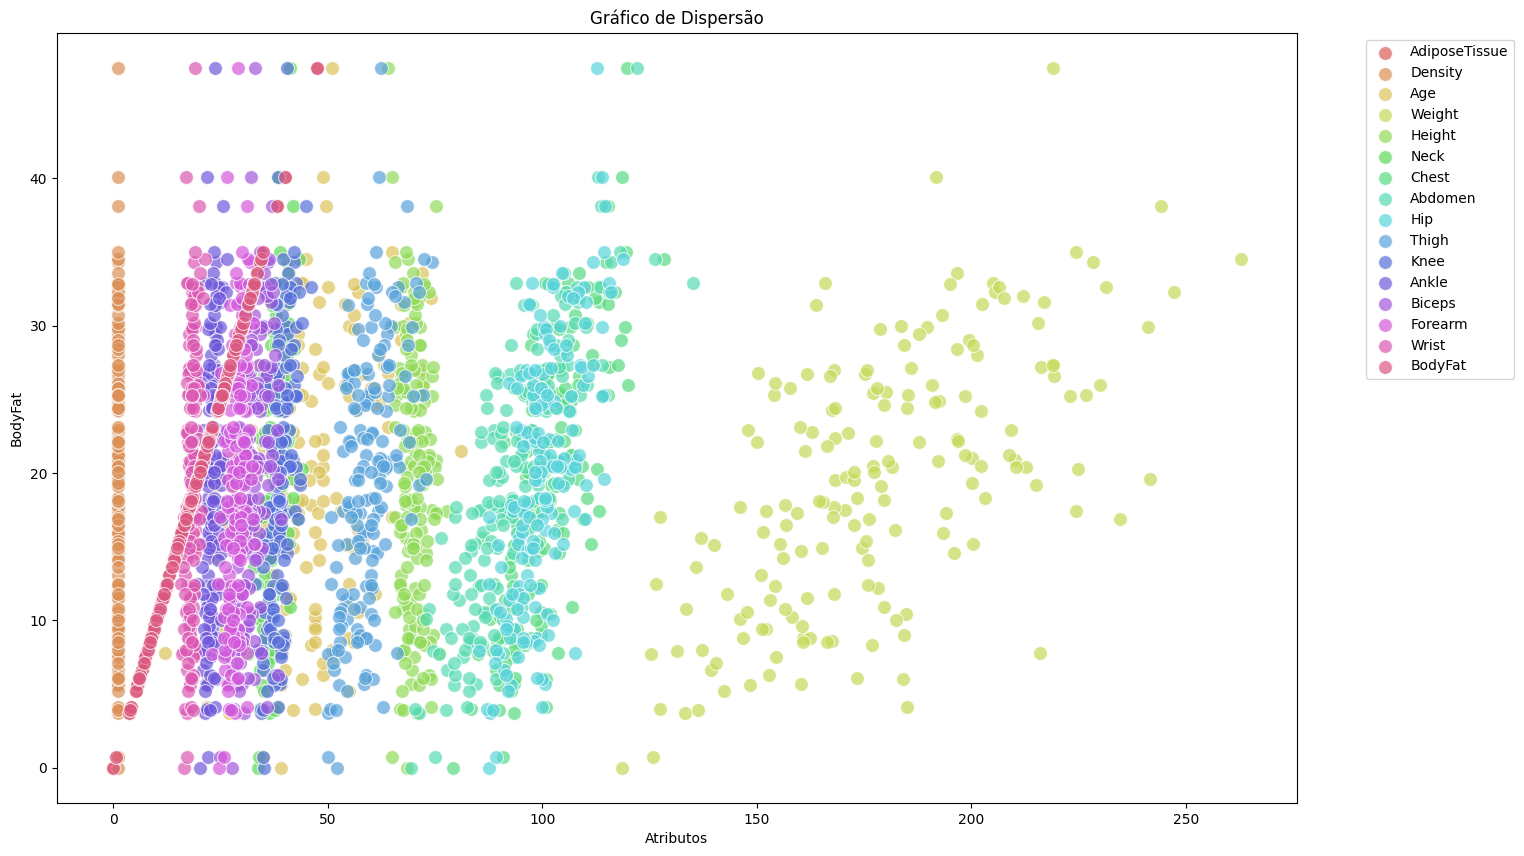

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Definir uma paleta de cores diferente para cada atributo
cores = sns.color_palette("hls", len(df_imputed.columns))

# Gráfico de Dispersão com legenda
plt.figure(figsize=(16, 10))
for i, column in enumerate(df_imputed.columns):
    x_offset = i * 0.1
    sns.scatterplot(data=df_imputed, x=column, y='BodyFat', alpha=0.7, label=column, color=cores[i], s=100)

plt.title('Gráfico de Dispersão')
plt.xlabel('Atributos')
plt.ylabel('BodyFat')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


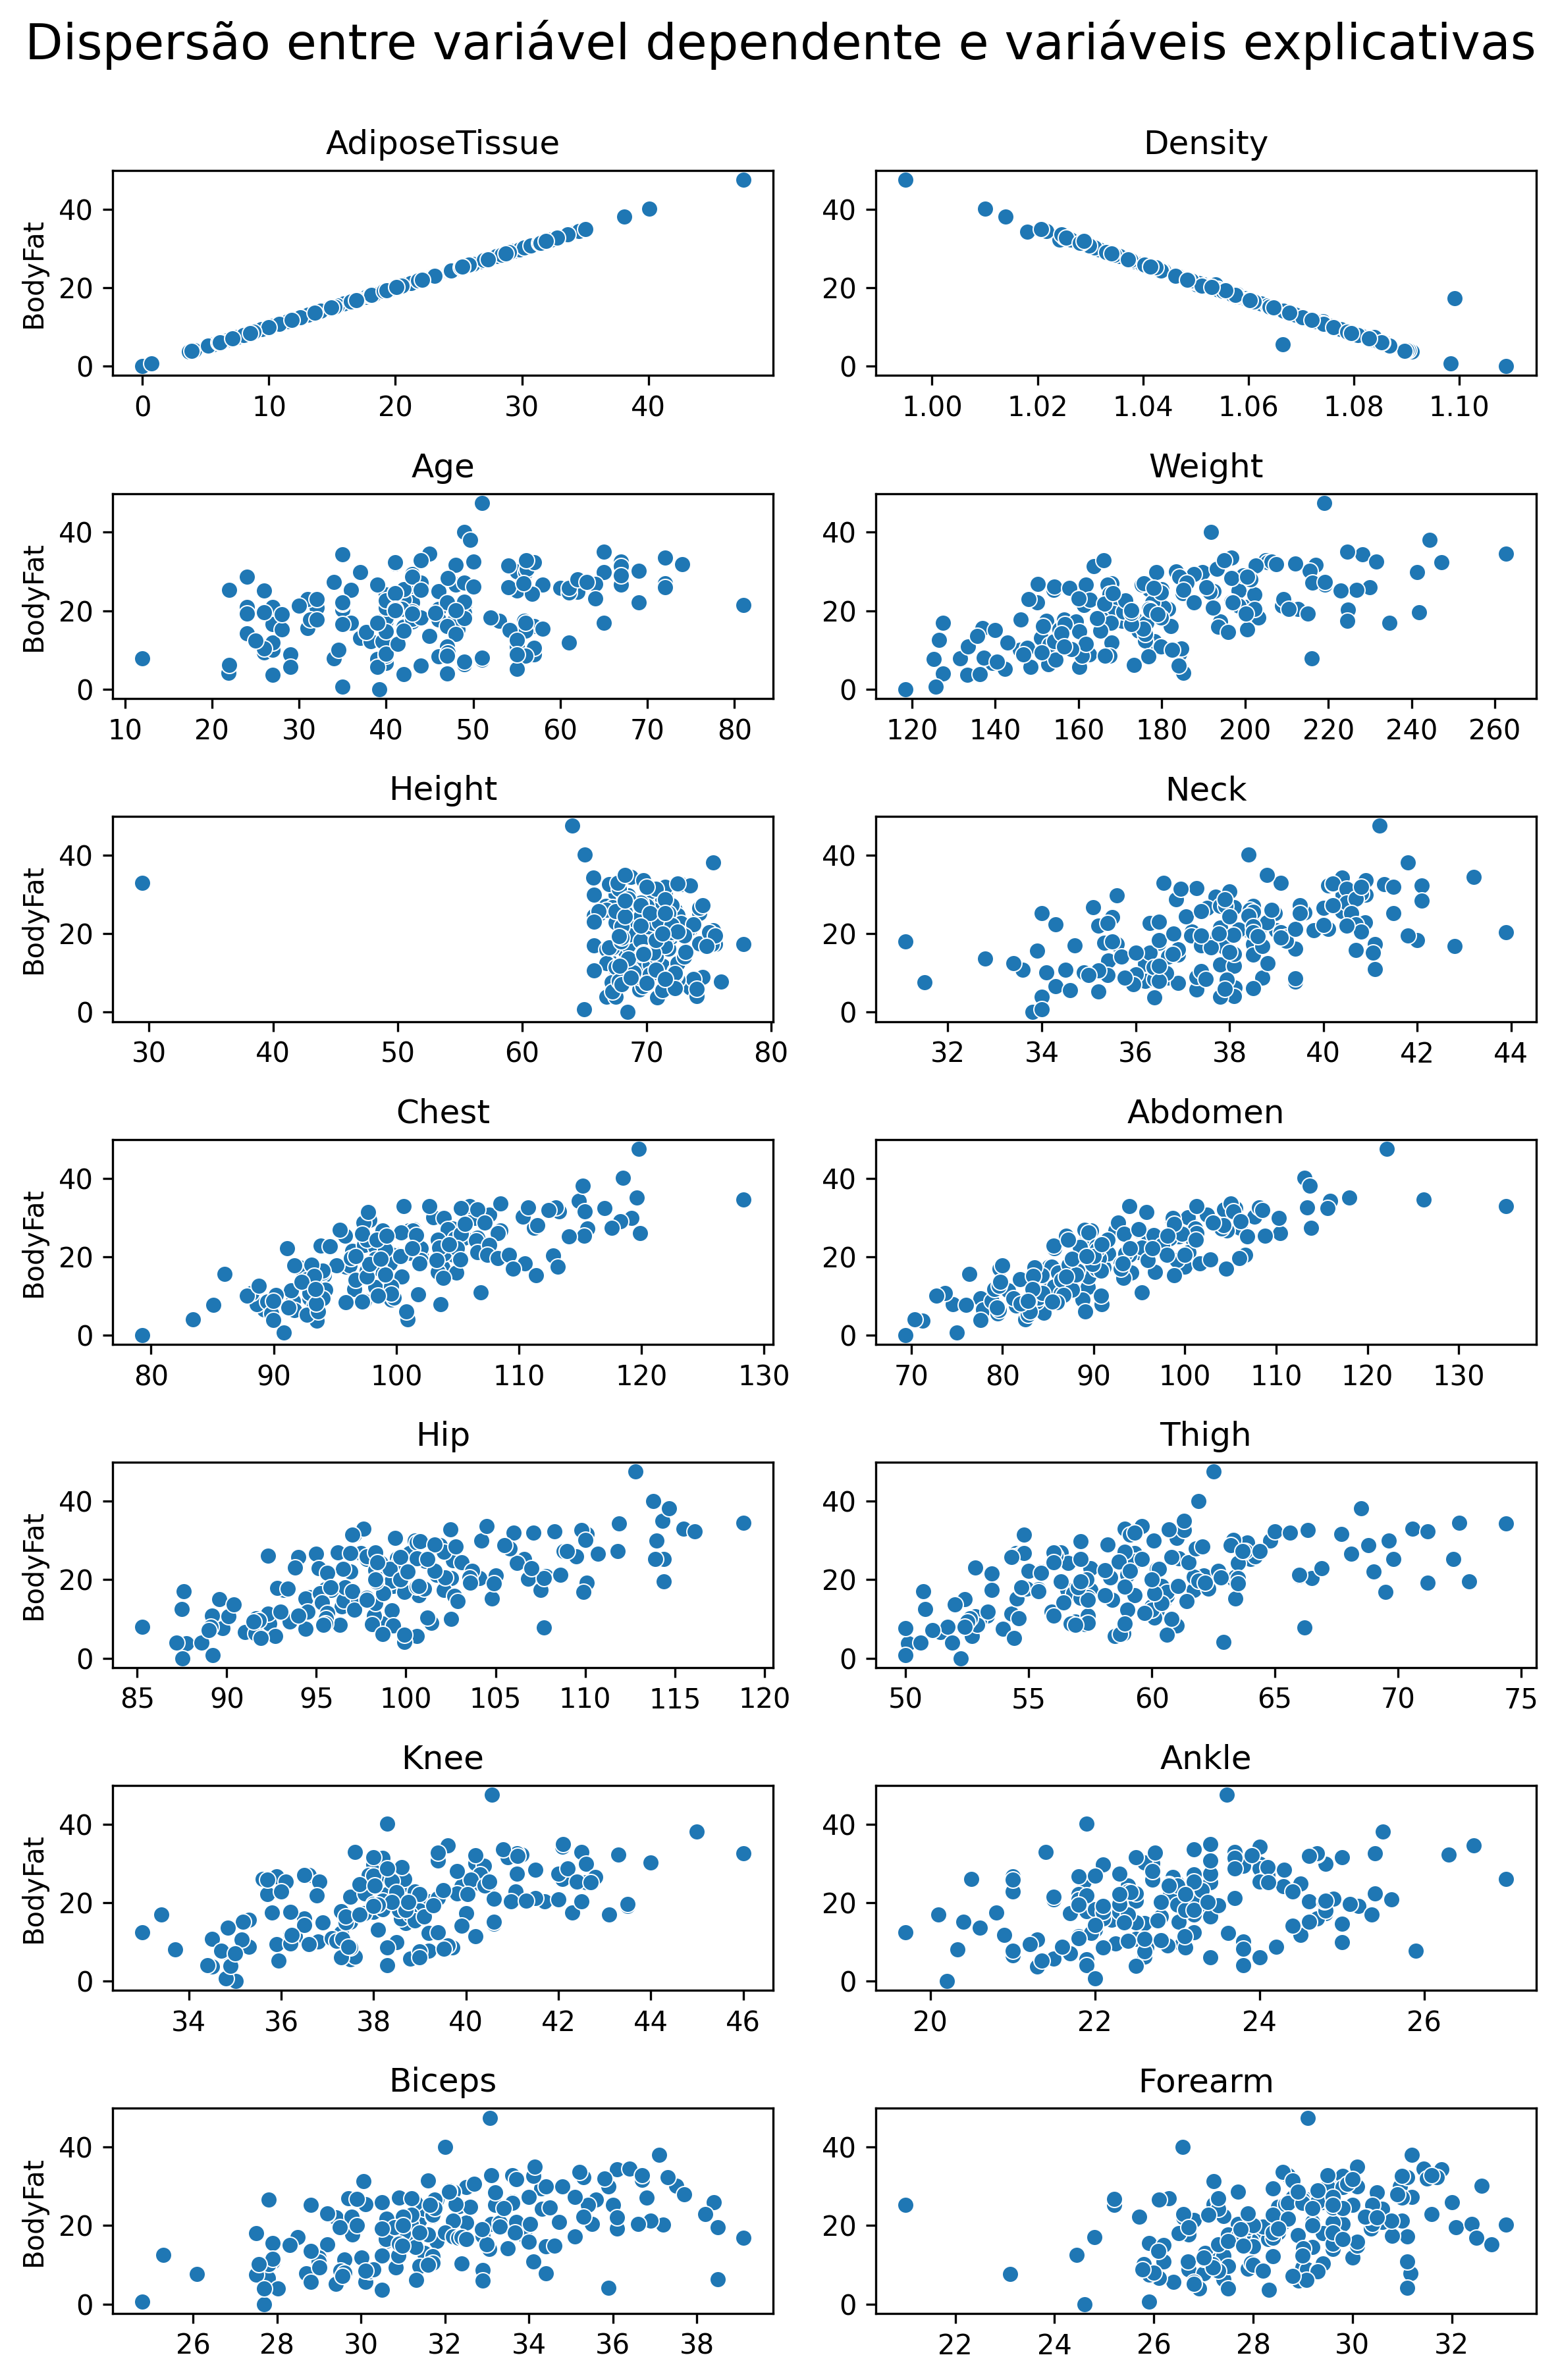

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

explanatory_variables = df_imputed.columns.tolist()
explanatory_variables.remove('BodyFat')  # Remover a variável dependente
dependent_variable = 'BodyFat'

# Criar subplots
num_subplots = min(len(explanatory_variables), 14)  # Limitar a 14 subplots
fig, axes = plt.subplots(nrows=num_subplots // 2 + num_subplots % 2, ncols=2, figsize=(8, 12), dpi=300)
axes = axes.flatten()

# Plotar os gráficos de dispersão
for i, column in enumerate(explanatory_variables[:num_subplots]):
    sns.scatterplot(data=df_imputed, x=column, y=dependent_variable, ax=axes[i])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(dependent_variable if i % 2 == 0 else None)
    axes[i].set_title(column)

# Título geral dos subplots
fig.suptitle('Dispersão entre variável dependente e variáveis explicativas', fontsize=18, y=1)

# Ajuste de layout e exibição
plt.tight_layout()
plt.show()


Detectar outliers usando IQR

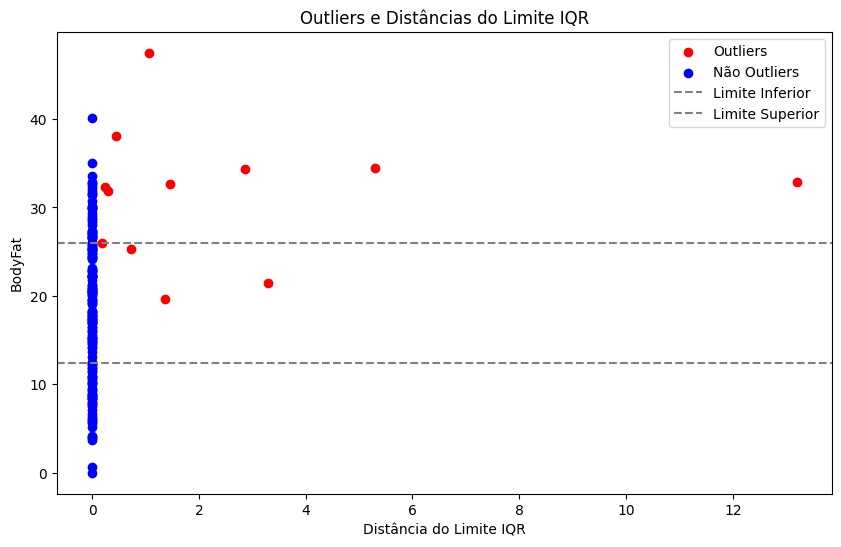

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt

# Definir uma função para detectar outliers usando IQR
def detect_outliers_iqr(df_imputed, threshold=1.5):
    Q1 = df_imputed.quantile(0.25)
    Q3 = df_imputed.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Calcular a distância de cada ponto aos limites do IQR
    distances = (df_imputed - lower_bound) * (df_imputed < lower_bound) + (df_imputed - upper_bound) * (df_imputed > upper_bound)

    # Identificar os outliers
    outliers = ((df_imputed < lower_bound) | (df_imputed > upper_bound)).any(axis=1)

    return outliers, distances

# Aplicar a função para detectar outliers em todas as colunas numéricas
outliers, distances = detect_outliers_iqr(df_imputed.select_dtypes(include=['number']))

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Plotar outliers em vermelho
plt.scatter(distances[outliers].max(axis=1), df_imputed[outliers]['BodyFat'], color='red', label='Outliers')

# Plotar não-outliers em azul
plt.scatter(distances[~outliers].max(axis=1), df_imputed[~outliers]['BodyFat'], color='blue', label='Não Outliers')

# Adicionar linhas de referência para os limites do IQR
plt.axhline(y=df_imputed['BodyFat'].quantile(0.25), color='gray', linestyle='--', label='Limite Inferior')
plt.axhline(y=df_imputed['BodyFat'].quantile(0.75), color='gray', linestyle='--', label='Limite Superior')

# Definir rótulos e título do gráfico
plt.xlabel('Distância do Limite IQR')
plt.ylabel('BodyFat')
plt.title('Outliers e Distâncias do Limite IQR')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

Remover os outliers

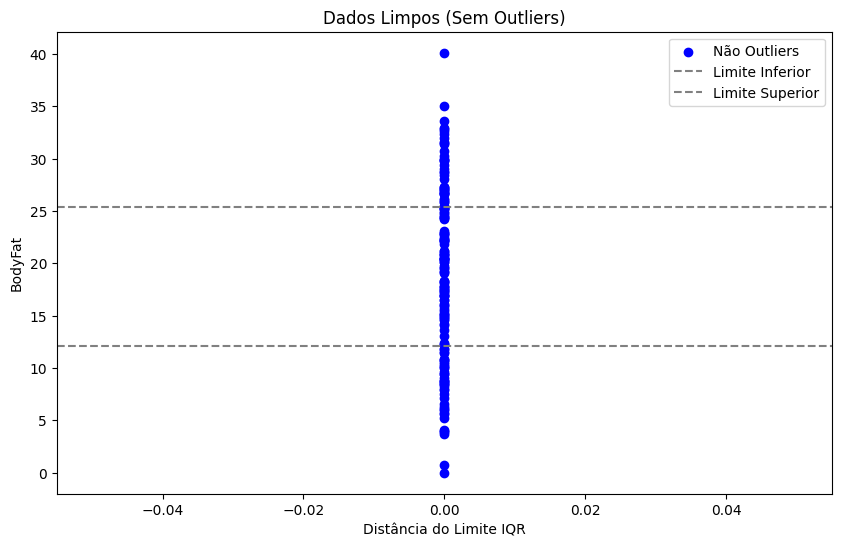

In [ ]:
# Identificar outliers usando a função detect_outliers_iqr
outliers, _ = detect_outliers_iqr(df_imputed.select_dtypes(include=['number']))

# Remover outliers do DataFrame original
df_imputed_cleaned = df_imputed[~outliers]

# Plotar o gráfico de dispersão dos dados limpos
plt.figure(figsize=(10, 6))

# Plotar os dados limpos em azul
plt.scatter(distances[~outliers].max(axis=1), df_imputed[~outliers]['BodyFat'], color='blue', label='Não Outliers')

# Adicionar linhas de referência para os limites do IQR
plt.axhline(y=df_imputed_cleaned['BodyFat'].quantile(0.25), color='gray', linestyle='--', label='Limite Inferior')
plt.axhline(y=df_imputed_cleaned['BodyFat'].quantile(0.75), color='gray', linestyle='--', label='Limite Superior')

# Definir rótulos e título do gráfico
plt.xlabel('Distância do Limite IQR')
plt.ylabel('BodyFat')
plt.title('Dados Limpos (Sem Outliers)')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


Imputar dados de teste da mesma maneira que os dados de treino

In [ ]:
import pandas as pd
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from google.colab import files

# Carregar o arquivo CSV usando o upload de arquivos do Colab
uploaded = files.upload()

# Ler o arquivo CSV em um DataFrame
df_test = pd.read_csv(next(iter(uploaded.keys())))

# Imputação por regressão linear
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=100)
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

test = df_test_imputed


Saving test.csv to test.csv


Comparar diferentes algoritmos com base no MSE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Definir conjuntos de treino e teste
X_train = df_imputed_cleaned.drop(columns=['BodyFat'])
y_train = df_imputed_cleaned['BodyFat']
X_test = df_test_imputed.drop(columns=['BodyFat'])
y_test = df_test_imputed['BodyFat']

# Definir modelos de regressão com os parâmetros desejados
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor()
}

# Iterar sobre os modelos
for model_name, model in models.items():
    # Construir o pipeline com escala dos dados (sem imputação)
    pipeline = Pipeline([
        ('model', model)
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Calcular a métrica de avaliação (neste caso, o erro quadrático médio)
    mse = mean_squared_error(y_test, y_pred)

    # Exibir a acurácia do modelo
    print(f'Model: {model_name}, Mean Squared Error: {mse}')


Model: Linear Regression, Mean Squared Error: 3.041051004815436e-27
Model: Ridge Regression, Mean Squared Error: 3.9399980426035015e-06
Model: Lasso Regression, Mean Squared Error: 0.01157190052722927
Model: Decision Tree, Mean Squared Error: 0.22842105263157914
Model: Random Forest, Mean Squared Error: 0.09311736842105249
Model: Gradient Boosting, Mean Squared Error: 0.03509272389139592
Model: K-Nearest Neighbors, Mean Squared Error: 9.867321052631578
Model: Support Vector Machine, Mean Squared Error: 29.196284854960776
Model: XGBoost, Mean Squared Error: 0.2158649851748325


Printar as previsões feitas com o lasso

In [ ]:


# Instanciar o modelo de regressão Lasso
lasso_model = Lasso()

# Treinar o modelo Lasso com os dados de treino
lasso_model.fit(X_train, y_train)

# Fazer previsões para o conjunto de teste
predictions = lasso_model.predict(X_test)

# Imprimir todas as previsões do 'BodyFat'
print(predictions)


[19.27452848 19.20444998 27.84857213 20.47347569 16.70520538 12.19140976
 23.50436819 18.59153049 11.87461257 12.0393377  26.0469252  24.44345701
 14.86219267 22.43705348  6.49199228  5.48936572 21.90527991 20.83796519
 20.36848362 14.04123565 14.93749872 16.61850828 13.9970756  13.86385747
 21.32949902 30.30414334 23.61826298 15.02935107  7.33502418 13.12368538
 24.7923735   9.79436297 17.50815611 18.43702515 18.74032163  3.94438307
 21.34005273 16.06807875 16.7058177  11.57605699 13.85169106 23.54877482
 31.03409564  9.54155306 13.96836289 22.45651973 28.85469383 21.40513899
 23.20253168 10.00422145 35.26764998 21.72936169 22.57562483 34.60211493
 13.64462684 29.46469338 10.48044721 12.47426668 24.68945372 29.12426517
  3.24350447 27.05194792 11.41230518 12.5398396  18.79275483 11.06277635
 12.47815992  6.80714386 22.04628454 13.4992423  12.97197431 18.13713526
 18.45344579 21.2311674  25.70874549 27.79565227]


Após optar por usar Lasso regression, exibir um gráfico comparando as previsões com valores reais

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Ativar a exibição inline no notebook (caso esteja usando Jupyter Notebook)
output_notebook()

# Criar um gráfico de figura
p = figure(title='Comparação entre Valores Reais e Previsões (Lasso Regression)',
           x_axis_label='Amostras', y_axis_label='Valores')

# Convertendo range para listas
y_test_list = list(y_test)
predictions_list = list(predictions)

# Adicionar as linhas para valores reais e previsões ao gráfico
p.line(list(range(len(y_test_list))), y_test_list, legend_label='Valores Reais', line_color='blue', line_width=2)
p.line(list(range(len(predictions_list))), predictions_list, legend_label='Previsões (Lasso)', line_color='red', line_width=2)

# Adicionar a legenda
p.legend.location = "top_left"

# Mostrar o gráfico
show(p)


Conclusão: Após